## Laboratory Session 2-Live

In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [2]:
"""
Here I want to download the deezer dataset from the given github link
my idea is to use the urllib library
to download the dataset directly instead of downloading it manually 
and then unzipping it
"""

"""
int this functions 
1 we get the main github directory URL
2 convert the url the into raw content base URL to get download each file that is available
3 accesssing the HTML of the directory page
4 checking wether the HTML is accessible or not
5 now we are using beacutifull soup library to extract the file names
6 now we are filtering the CSV files and removing the duplicates as well
7 now we are downloading each file from the raw URL
"""


# GitHub directory URL
github_url = "https://github.com/benedekrozemberczki/karateclub/tree/master/dataset/node_level/deezer"

# Convert the GitHub directory URL into the raw content base URL
raw_base_url = "https://raw.githubusercontent.com/benedekrozemberczki/karateclub/master/dataset/node_level/deezer/"

# Step 1: Get the HTML of the directory page
response = requests.get(github_url)
if response.status_code != 200:
    print("Failed to fetch the directory page")
    exit()

# Step 2: Parse the page and extract file names
soup = BeautifulSoup(response.text, "html.parser")
# print(f"soup library is used to extract the file names\n {soup}")
file_names = []

for link in soup.find_all("a", {"href": True}):
    href = link["href"]
    if href.endswith(".csv"):  # Filter CSV files
        file_name = href.split("/")[-1]  # Extract filename
        if file_name not in file_names:
            file_names.append(file_name)



if not file_names:
    print("No CSV files found. Check if the directory is correct.")
    exit()
else:
    print(f"Found {len(file_names)} CSV files:")
    for name in file_names:
        print(name)
        
        
# Step 3: Download each file
for file_name in file_names:
    file_url = raw_base_url + file_name  # Construct raw URL
    print(f"Downloading {file_name} from {file_url}...")
    
    try:
        urllib.request.urlretrieve(file_url, file_name)
        print(f"Download complete: {file_name}")
    except Exception as e:
        print(f"Error downloading {file_name}: {e}")


Found 3 CSV files:
edges.csv
features.csv
target.csv
Download complete: edges.csv
Download complete: features.csv
Download complete: target.csv


In [3]:
# Load the CSV files into pandas DataFrames
edge_file = "edges.csv"
feature_file = "features.csv"
target_file = "target.csv"

edges_df = pd.read_csv(edge_file)
feature_df= pd.read_csv(feature_file)
target_df = pd.read_csv(target_file)


In [6]:
# N_nodes=100
G = nx.Graph()
G.add_edges_from(edges_df[['id_1', 'id_2']].values)

G = nx.DiGraph(G)
# G=nx.fast_gnp_random_graph(N_nodes,p=0.1,seed=0)
InDegreeCentrality=nx.in_degree_centrality(G)
# print(InDegreeCentrality[0])

sorted_InDegreeCentrality=sorted(InDegreeCentrality.items(), key=lambda x:x[1], reverse=True)

H_InDegreeCentrality=[]

for values in sorted_InDegreeCentrality:
    if len(H_InDegreeCentrality)>=100:
        break
    else:
        H_InDegreeCentrality.append(values)

# print(H_InDegreeCentrality[1][0])

# now i am extracting the top 100 nodes only

top_100_nodes=[node for node, centrality in H_InDegreeCentrality]

# print(top_100_nodes)

subGraph=G.subgraph(top_100_nodes)

print(f"Subgraph contains {subGraph.number_of_nodes()} nodes and {subGraph.number_of_edges()} edges.", subGraph)


Subgraph contains 100 nodes and 544 edges. DiGraph with 100 nodes and 544 edges


## a- Displays the whole graph using Gephi visualization, and highlights the node with the highest degree.

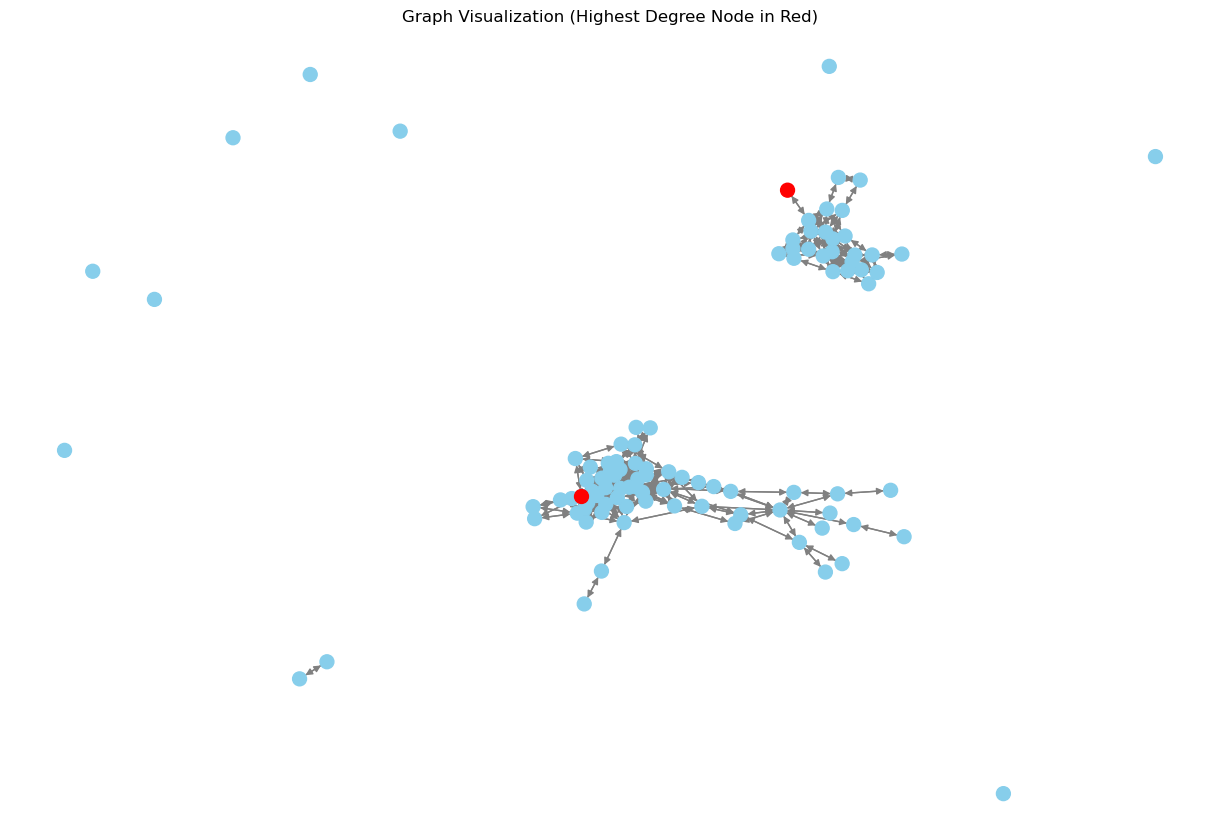

In [7]:
"""
in this program I will be displaying the graph using Gephi Visulization with the help of networkx library
1. Import the necessary libraries.
2. Load the CSV files into pandas DataFrames.
3. Create a graph using NetworkX.
"""





# Create a graph
# G = nx.Graph()
# G.add_edges_from(edges_df[['id_1', 'id_2']].values)
# N_Nodes=100
# G=fast_gnp_random_graph(N_nodes,p=0.1,seed=0)
# degree_centrality= nx.degree_centrality(decent)

max_top_100_node = max(H_InDegreeCentrality, key=lambda x: x[1])[0]

# print(max_top_100_node)

# # Assign colors (highlight the highest-degree node)
node_colors = ['red' if node == max_top_100_node else 'skyblue' for node in top_100_nodes]
# print(node_colors)
# # Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subGraph) 
nx.draw(subGraph, pos, with_labels=False, node_size=100, node_color=node_colors, edge_color='gray')

# Highlight the highest-degree node separately
nx.draw_networkx_nodes(subGraph, pos, nodelist=[max_top_100_node], node_color='red', node_size=100)

plt.title("Graph Visualization (Highest Degree Node in Red)")
plt.show()

## b- Enumerates the various components of the network and indicating the size of each component

Total number of components: 12
Sizes of components:
Component 1: 26 nodes
Component 2: 63 nodes
Component 3: 1 nodes
Component 4: 2 nodes
Component 5: 1 nodes
Component 6: 1 nodes
Component 7: 1 nodes
Component 8: 1 nodes
Component 9: 1 nodes
Component 10: 1 nodes
Component 11: 1 nodes
Component 12: 1 nodes


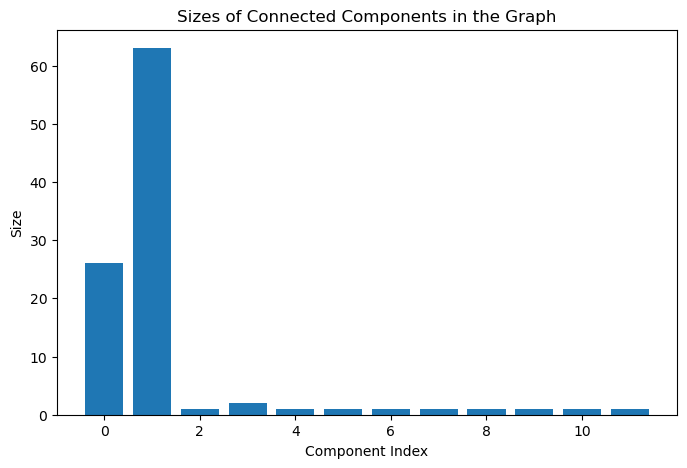

In [10]:
# Finding weakly connected components
# Why weakly connected components: Treats the graph as undirected when determining connectivity.

components = list(nx.weakly_connected_components(subGraph))

# Compute the size of each component
component_sizes = [len(component) for component in components]

# Print the total number of components and their sizes
print(f"Total number of components: {len(components)}")
print("Sizes of components:")
for i, size in enumerate(component_sizes):
    print(f"Component {i+1}: {size} nodes")


# Display the sizes in a bar plot
plt.figure(figsize=(8, 5))
plt.bar(range(len(component_sizes)), component_sizes)
plt.xlabel("Component Index")
plt.ylabel("Size")
plt.title("Sizes of Connected Components in the Graph")
plt.show()

## c- Displays the distribution (histogram) of degree centrality, eigenvector centrality, page rank centrality.
## d- Repeat c- when using closeness centrality, betweenness centrality

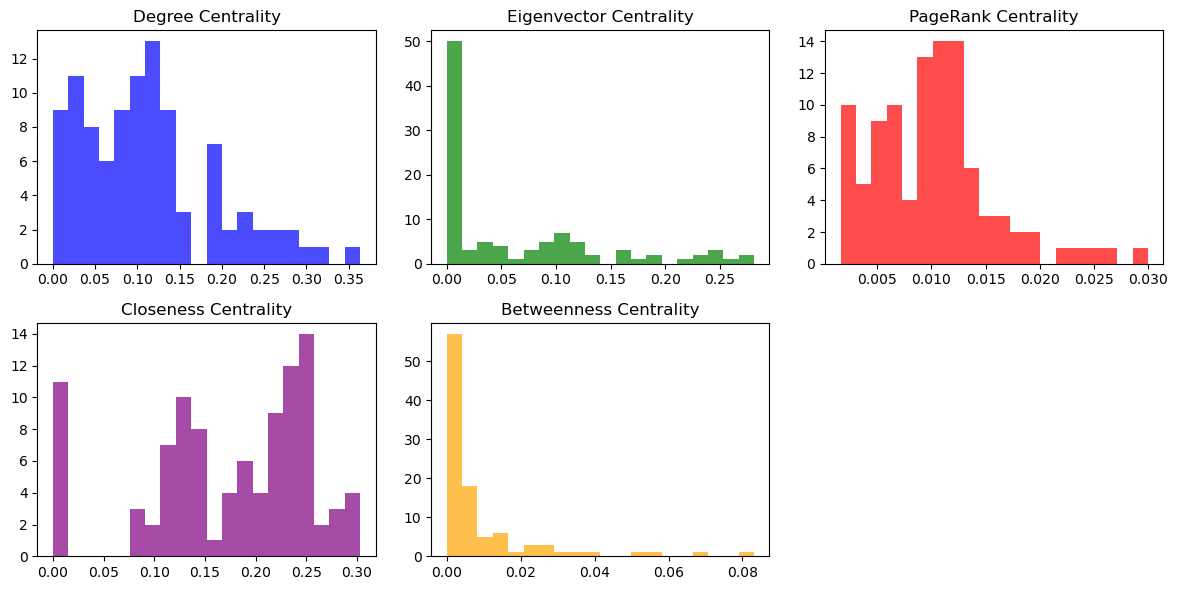

In [16]:


# Compute eigenvector centrality for the largest component with random start and more iterations
nstart = {node: random.random() for node in subGraph.nodes()}
eigenvector_centrality = nx.eigenvector_centrality(subGraph, tol=1e-5, nstart=nstart)

pagerank_centrality = nx.pagerank(subGraph)
closeness_centrality = nx.closeness_centrality(subGraph)
betweenness_centrality = nx.betweenness_centrality(subGraph)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(degree_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.title("Degree Centrality")

plt.subplot(2, 3, 2)
plt.hist(eigenvector_centrality.values(), bins=20, color='green', alpha=0.7)
plt.title("Eigenvector Centrality")

plt.subplot(2, 3, 3)
plt.hist(pagerank_centrality.values(), bins=20, color='red', alpha=0.7)
plt.title("PageRank Centrality")

plt.subplot(2, 3, 4)
plt.hist(closeness_centrality.values(), bins=20, color='purple', alpha=0.7)
plt.title("Closeness Centrality")

plt.subplot(2, 3, 5)
plt.hist(betweenness_centrality.values(), bins=20, color='orange', alpha=0.7)
plt.title("Betweenness Centrality")

plt.tight_layout()
plt.show()


## e- Repeat c- and d- for largest component of the network

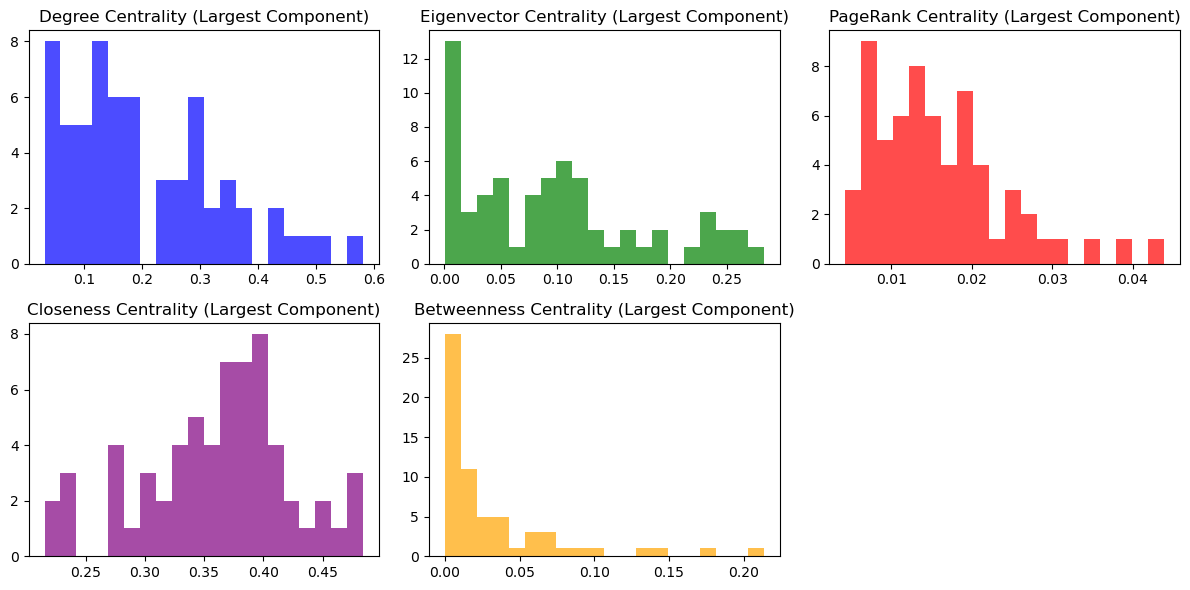

In [17]:


# Find the largest connected component
largest_component = max(nx.weakly_connected_components(subGraph), key=len)
G_largest = G.subgraph(largest_component).copy()  # Copy to avoid issues with mutability

# Compute centralities for the largest component
degree_centrality = nx.degree_centrality(G_largest)

# Handle eigenvector centrality convergence issue
try:
    nstart = {node: random.random() for node in G_largest.nodes()}  # Random start vector
    eigenvector_centrality = nx.eigenvector_centrality(G_largest, max_iter=500, tol=1e-3, nstart=nstart)
except nx.PowerIterationFailedConvergence:
    print("Warning: Eigenvector centrality did not converge, skipping.")
    eigenvector_centrality = {node: 0 for node in G_largest.nodes()}  # Assign zero if it fails

pagerank_centrality = nx.pagerank(G_largest)
closeness_centrality = nx.closeness_centrality(G_largest)
betweenness_centrality = nx.betweenness_centrality(G_largest)

# Plot histograms for largest component
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(degree_centrality.values(), bins=20, color='blue', alpha=0.7)
plt.title("Degree Centrality (Largest Component)")

plt.subplot(2, 3, 2)
plt.hist(eigenvector_centrality.values(), bins=20, color='green', alpha=0.7)
plt.title("Eigenvector Centrality (Largest Component)")

plt.subplot(2, 3, 3)
plt.hist(pagerank_centrality.values(), bins=20, color='red', alpha=0.7)
plt.title("PageRank Centrality (Largest Component)")

plt.subplot(2, 3, 4)
plt.hist(closeness_centrality.values(), bins=20, color='purple', alpha=0.7)
plt.title("Closeness Centrality (Largest Component)")

plt.subplot(2, 3, 5)
plt.hist(betweenness_centrality.values(), bins=20, color='orange', alpha=0.7)
plt.title("Betweenness Centrality (Largest Component)")

plt.tight_layout()
plt.show()


## f- Displays the local clustering coefficient of each node, and draws the corresponding distribution function for the largest component.

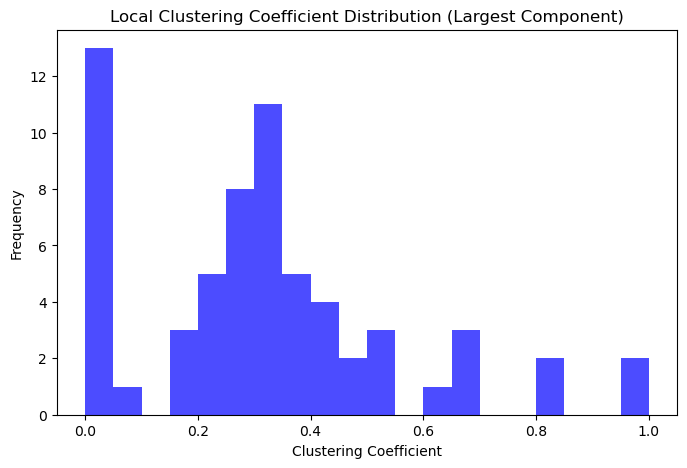

In [18]:
# Compute local clustering coefficient
clustering_coeffs = nx.clustering(G_largest)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(clustering_coeffs.values(), bins=20, color='blue', alpha=0.7)
plt.title("Local Clustering Coefficient Distribution (Largest Component)")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()


## g- Calculates the global clustering coefficient of the overall graph (or its largest connected component).

In [19]:
global_clustering = nx.transitivity(subGraph)  # Global clustering coefficient
print(f"Global Clustering Coefficient: {global_clustering:.4f}")

Global Clustering Coefficient: 0.3115


## h- Identify a subgraph, which is bipartie graph

Extracted a bipartite subgraph.


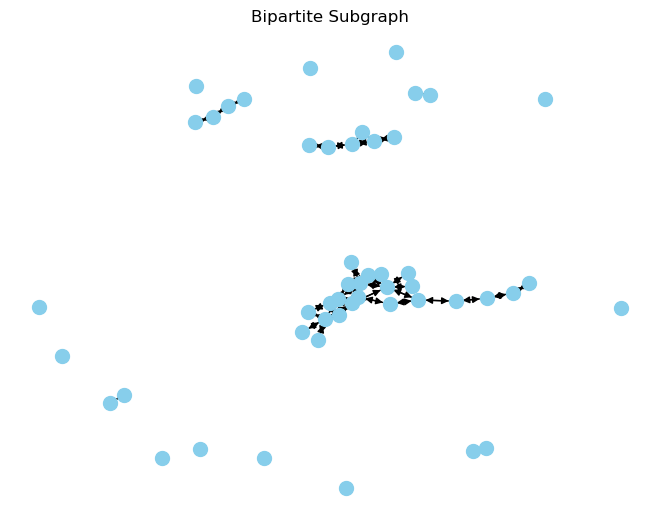

In [20]:
from networkx.algorithms import bipartite

# Check if the graph is bipartite
is_bipartite = bipartite.is_bipartite(subGraph)

if is_bipartite:
    print("The graph is bipartite.")
else:
    # Extract a bipartite subgraph (approximate)
    nodes = list(subGraph.nodes())
    subgraph_nodes = nodes[:len(nodes)//2]  # Take half of the nodes
    B = G.subgraph(subgraph_nodes)

    print("Extracted a bipartite subgraph.")
    nx.draw(B, with_labels=False, node_size=100, node_color='skyblue')
    plt.title("Bipartite Subgraph")
    plt.show()
